In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

Setup the 2006 dataframe

In [2]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

In [3]:
len(six)

55035

Create the 2006 Class Variable

In [4]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

Select the fields to study 2006 current co-incident drug use

In [5]:

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

Select the fields to study 2006 Demographic effects

In [6]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [7]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,CLASS
QUESTID2,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,1
79748602,0,1,0,0,0,0,0,0,0,0,0,0
66270602,0,1,0,0,0,0,0,0,0,0,0,0
32480602,1,1,0,0,0,0,0,0,0,0,0,0
40722602,1,1,0,0,0,0,0,0,0,0,0,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [8]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [9]:
len(tw1)

58034

In [10]:
tw1["CLASS"] = tw1["OPIANYYR"]

In [11]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [12]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [13]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,CLASS
QUESTID2,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,0
10004796,0,1,0,0,0,0,0,0,1,0,0,0
10007045,0,1,0,0,0,0,0,1,0,0,0,1
10008166,0,1,0,0,0,0,0,0,0,0,0,0
10009495,0,1,0,0,0,0,0,0,0,0,1,0


ANALYSIS OF 2006 DATA

In [14]:
six_pop_size = len(six_otherdrug)

In [15]:
six_opium_user = len(six_otherdrug[six_otherdrug["CLASS"]==1])

In [16]:
pct_drug_coinc_2006 = [
    len(six_otherdrug[(six_otherdrug["CLASS"]==1) 
        & (six_otherdrug[x]==1)])/six_opium_user 
    for x in drug_use2006[0:11]]

In [17]:
pct_druguse_overall_2006 = [
    len(six_otherdrug[(six_otherdrug[x]==1)])/six_pop_size 
    for x in drug_use2006]

Analysis of 2021 Data

In [18]:
tw1_pop_size = len(tw1_otherdrug) 

In [19]:
tw1_opium_user = len(tw1_otherdrug[tw1_otherdrug["CLASS"]==1])

In [20]:
pct_drug_coinc_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug["CLASS"]==1) 
        & (tw1_otherdrug[x]==1)])/tw1_opium_user 
    for x in drug_use2021[0:11]]

In [21]:
pct_druguse_overall_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug[x]==1)])/tw1_pop_size 
    for x in drug_use2021]

Visualizing change of usage rates between 2006 to 2021

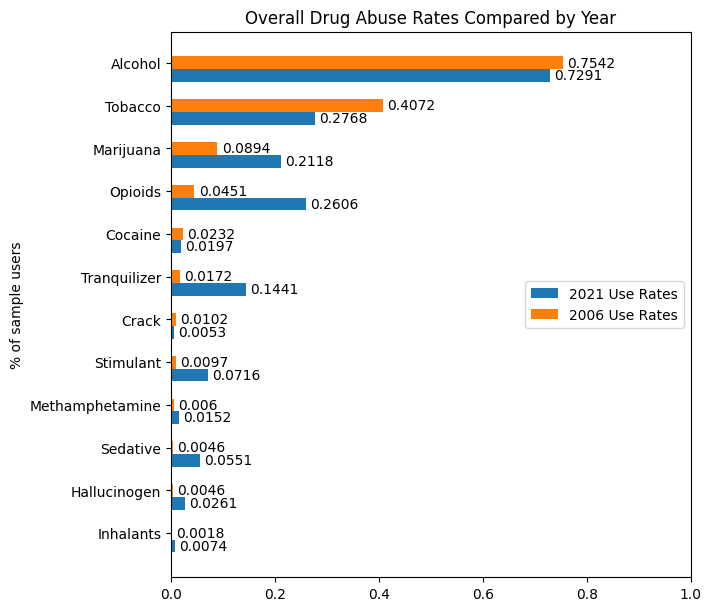

In [22]:
drug_class = ("Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative","Opioids")

drug_class_sorted = list(np.array(drug_class)[np.argsort(pct_druguse_overall_2006)])
use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2006)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_druguse_overall_2006)[np.argsort(pct_druguse_overall_2006)],4)),
}

x = np.arange(len(drug_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Overall Drug Abuse Rates Compared by Year')
ax.set_yticks(x + width, drug_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

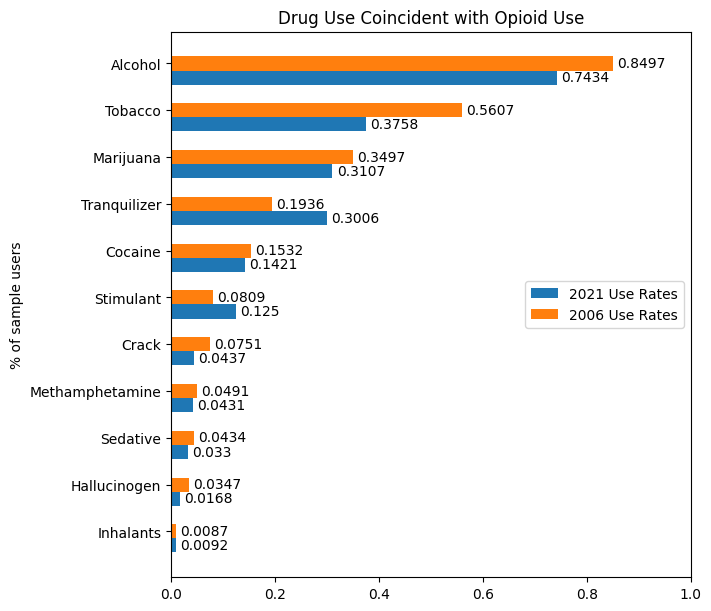

In [23]:


opioid_comp_class = ["Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative"]

opioid_comp_class_sorted = list(np.array(opioid_comp_class)[np.argsort(pct_drug_coinc_2006)])

use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)],4)),
}

x = np.arange(len(opioid_comp_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Drug Use Coincident with Opioid Use')
ax.set_yticks(x + width, opioid_comp_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

In [24]:
age_use2006 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALAGE',
               'IRINHAGE','IRTRNAGE','IRSTMAGE',
               'IRMTHAGE','IRSEDAGE','CLASS'
              ]
#Alcohol, Tobacco, Marijuana, Tranquilizer, 
#Cocaine, Stimulant, Crack, Methamphetamine, 
#Sedative, Hallucinogen, Inhalants

In [25]:
age_use2021 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALLUCAGE',
               'IRINHALAGE','IRMETHAMAGE','IRTRQNMAGE',
               'IRSTMNMAGE','IRSEDNMAGE','CLASS'
              ]

In [26]:
six_ageuse = six.loc[six["CATAG3"]==4,age_use2006]
tw1_ageuse = tw1.loc[tw1["CATAG3"]==4,age_use2021]

In [27]:
#for x in age_use2021:
#    tw1_ageuse = tw1_ageuse[tw1_ageuse[x]<100]

#for x in age_use2006:
#    six_ageuse = six_ageuse[six_ageuse[x]<100]

#tw1_ageuse.head()

#for x in age_use2021[0:11]:
#    tw1_ageuse.loc[tw1_ageuse[x]>100,x]=-10

#for x in age_use2006[0:11]:
#    six_ageuse.loc[six_ageuse[x]>100,x]=-10

#six_ageuse.loc[six_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10

#six_ageuse.loc[six_ageuse['IRALCAGE']>100,'IRALCAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRALCAGE']>100,'IRALCAGE']=-10



In [28]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr))*stdev

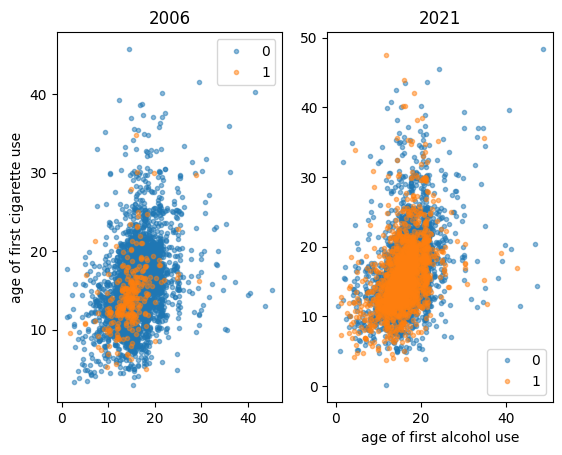

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRCIGAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRCIGAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.5)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.5)
    

ax1.set_ylabel('age of first cigarette use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

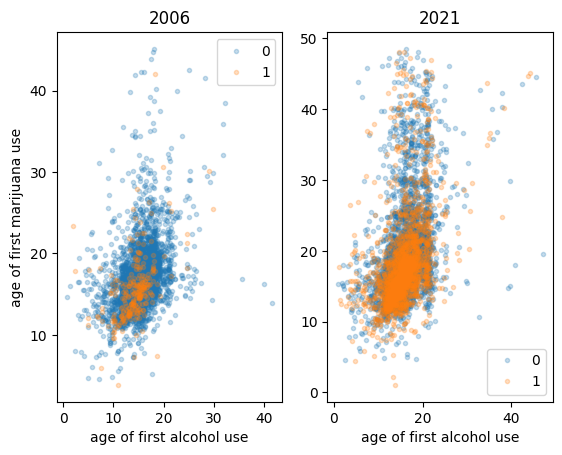

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRMJAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRMJAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first marijuana use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

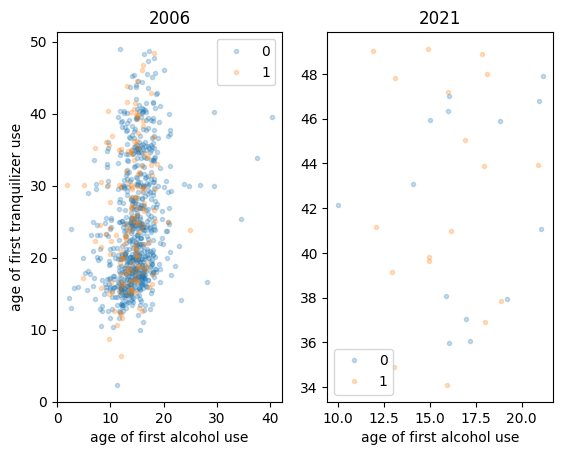

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRTRNAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRTRQNMAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRNAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRQNMAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first tranquilizer use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

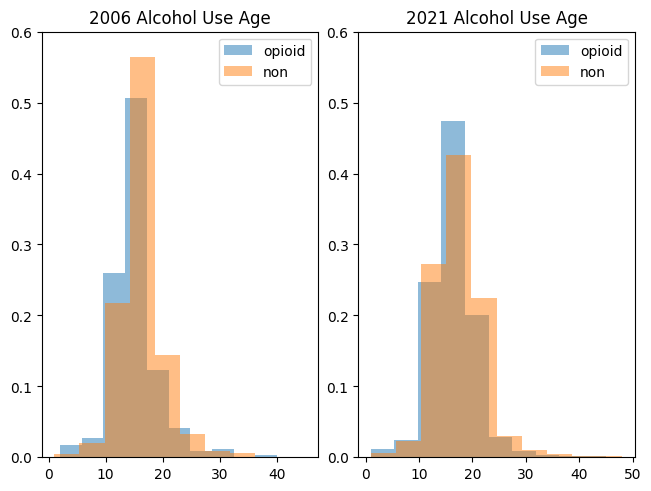

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==1),'IRALCAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==1),'IRALCAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Alcohol Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Alcohol Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

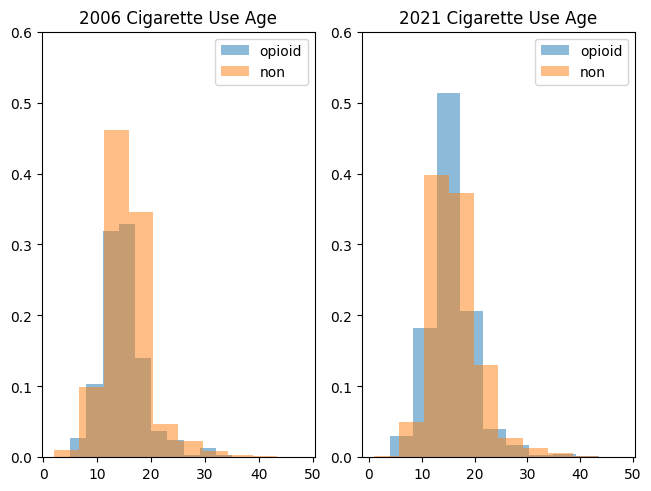

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==1),'IRCIGAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==1),'IRCIGAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Cigarette Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Cigarette Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

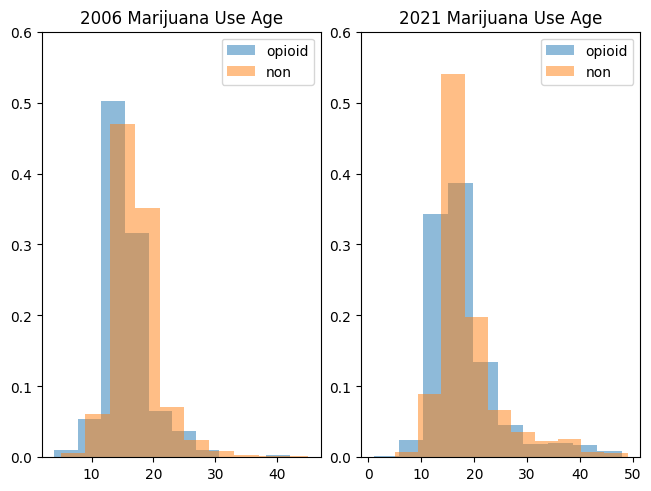

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==1),'IRMJAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==1),'IRMJAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Marijuana Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Marijuana Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

DEMOGRAPHIC DATA EXPLORATION

In [35]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

In [36]:
six_demo = six.loc[six["CATAG3"]==4,demo2006]
tw1_demo = tw1.loc[tw1["CATAG3"]==4,demo2021]

In [37]:
len(six_demo)

7665

In [38]:
len(tw1_demo)

12561

In [39]:
six_user_len = len(six_demo[six_demo["CLASS"]==1])
six_user_len

346

In [40]:
tw1_user_len = len(tw1_demo[tw1_demo["CLASS"]==1])
tw1_user_len

3273

IN-PATIENT MENTAL HEALTH TREATMENT

In [41]:
tw1_treat_count = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].count()[0]
six_treat = six_demo.loc[(six_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/six_user_len
tw1_treat = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/tw1_treat_count

In [42]:
d = {2006:[x for x in six_treat],2021:[x for x in tw1_treat]}
treat = pd.DataFrame(data=d,index=["Yes","No"])

<Axes: title={'center': 'PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR'}>

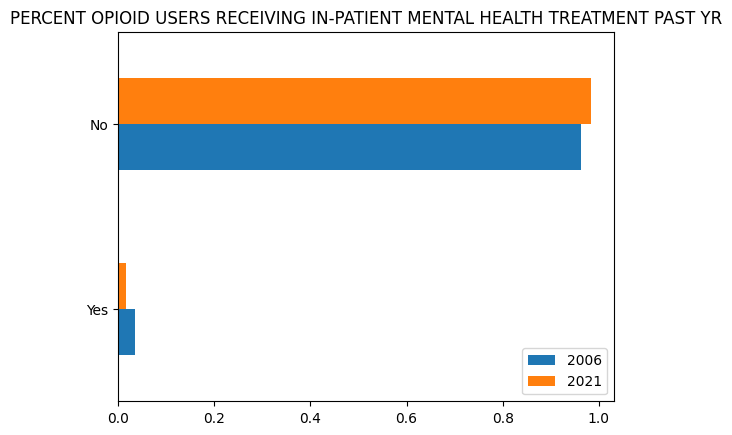

In [43]:
treat.plot.barh(title="PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR")

SEVERE PSYCHOLOGICAL DISTRESS

In [44]:
six_psych = six_demo.loc[(six_demo["CLASS"]==1),["SPDYRADJ"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_psych = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SPDPSTYR"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [45]:
d = {2006:[x for x in six_psych],2021:[x for x in tw1_psych]}
psych = pd.DataFrame(data=d,index=["No","Yes"])

<Axes: title={'center': 'PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR'}>

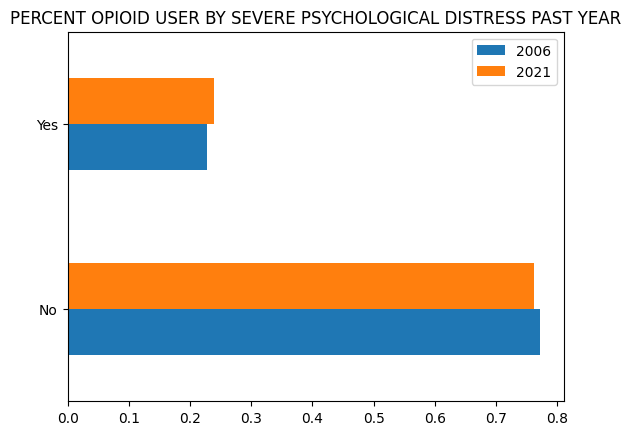

In [46]:
psych.plot.barh(title="PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR")

MAJOR DEPRESSIVE EPISODE

In [47]:
six_depress = six_demo.loc[(six_demo["CLASS"]==1),["AJAMDEYR"]].value_counts().sort_index()/six_user_len
tw1_depress = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRAMDEYR"]].value_counts().sort_index()/tw1_user_len

In [48]:
d = {2006:[x for x in six_depress],2021:[x for x in tw1_depress]}
depress = pd.DataFrame(data=d,index=["No","Yes"])

In [49]:
depress

,2006,2021
No,0.176301,0.857012
Yes,0.812139,0.142988


<Axes: title={'center': 'PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR'}>

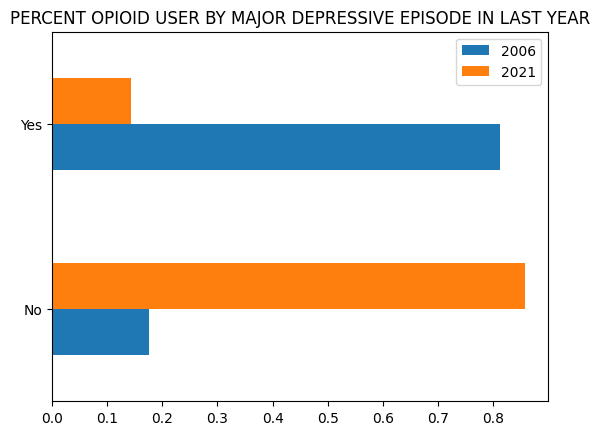

In [50]:
depress.plot.barh(title="PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR")

MARITAL STATUS

In [51]:
six_married = six_demo.loc[(six_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_married = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [52]:
d = {2006:[x for x in six_married],2021:[x for x in tw1_married]}
married = pd.DataFrame(data=d,index=["Married","Widowed","Divorced/Separated","Never Married"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY MARITAL STATUS'}>

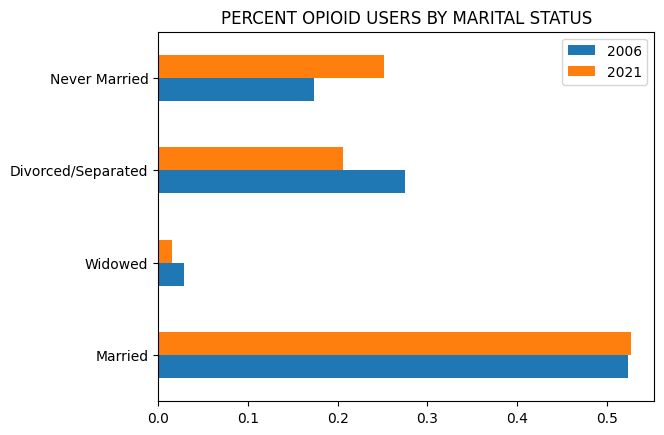

In [53]:
married.plot.barh(title="PERCENT OPIOID USERS BY MARITAL STATUS")

OVERALL HEALTH CONDITION

In [54]:
six_health = six_demo.loc[(six_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/six_user_len
tw1_health = tw1_demo.loc[(tw1_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/tw1_user_len

In [55]:
d = {2006:[x for x in six_health],2021:[x for x in tw1_health]}
health = pd.DataFrame(data=d,index=["Excellent","Very Good","Good","Fair/Poor"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL'}>

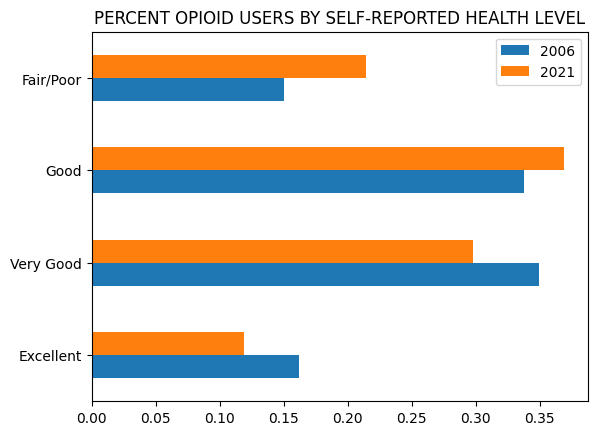

In [56]:
health.plot.barh(title="PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL")

EMPLOYMENT

In [57]:
six_employment = six_demo.loc[(six_demo["CLASS"]==1),["EMPSTATY"]].value_counts().sort_index()/six_user_len
tw1_employment = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRWRKSTAT"]].value_counts().sort_index()/tw1_user_len

In [58]:
d = {2006:[x for x in six_employment],2021:[x for x in tw1_employment]}
employment = pd.DataFrame(data=d,index=["FULL TIME","PART TIME","UNEMPLOYED","OTHER"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EMPLOYMENT STATUS'}>

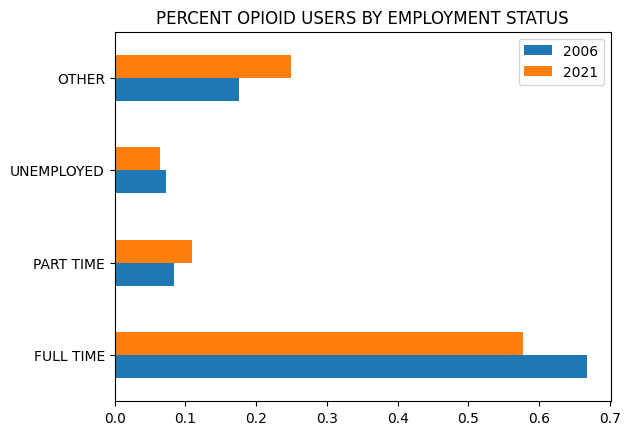

In [59]:
employment.plot.barh(title="PERCENT OPIOID USERS BY EMPLOYMENT STATUS")

EDUCATION

In [60]:
six_educate = six_demo.loc[(six_demo["CLASS"]==1),["EDUCCAT2"]].value_counts().sort_index()/six_user_len
tw1_educate = tw1_demo.loc[(tw1_demo["CLASS"]==1),["EDUHIGHCAT"]].value_counts().sort_index()/tw1_user_len

In [61]:
d = {2006:[x for x in six_educate],2021:[x for x in tw1_educate]}
educate = pd.DataFrame(data=d,index=["SOME HS","HS GRAD","SOME COLLEGE","COLLEGE GRAD"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EDUCATION LEVEL'}>

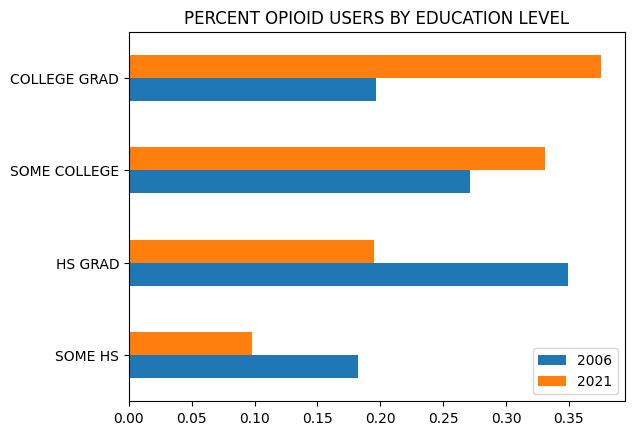

In [62]:
educate.plot.barh(title="PERCENT OPIOID USERS BY EDUCATION LEVEL")

GENDER AND RACE

In [63]:
six_sexrace = six_demo.loc[(six_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/six_user_len
tw1_sexrace = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/tw1_user_len

In [64]:
d = {2006:[x for x in six_sexrace],2021:[x for x in tw1_sexrace]}
sexrace = pd.DataFrame(data=d,index=["White Male",
                                     "White Female",
                                     "Black Male",
                                     "Black Female",
                                     "Hispanic Male",
                                     "Hispanic Female",
                                     "Other"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RACE/GENDER'}>

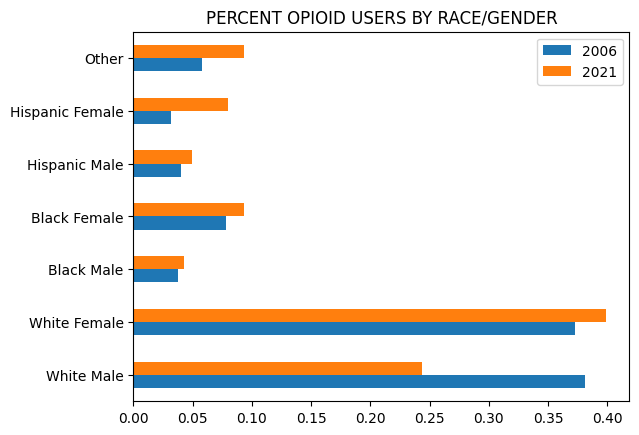

In [65]:
sexrace.plot.barh(title="PERCENT OPIOID USERS BY RACE/GENDER")

POVERTY

In [66]:
six_poverty = six_demo.loc[(six_demo["CLASS"]==1),["POVERTY2"]].value_counts().sort_index()/six_user_len
tw1_poverty = tw1_demo.loc[(tw1_demo["CLASS"]==1),["POVERTY3"]].value_counts().sort_index()/tw1_user_len

In [67]:
d = {2006:[x for x in six_poverty],2021:[x for x in tw1_poverty]}
poverty = pd.DataFrame(data=d,index=["Poverty","2xPoverty",">2xPoverty"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY POVERTY LEVEL'}>

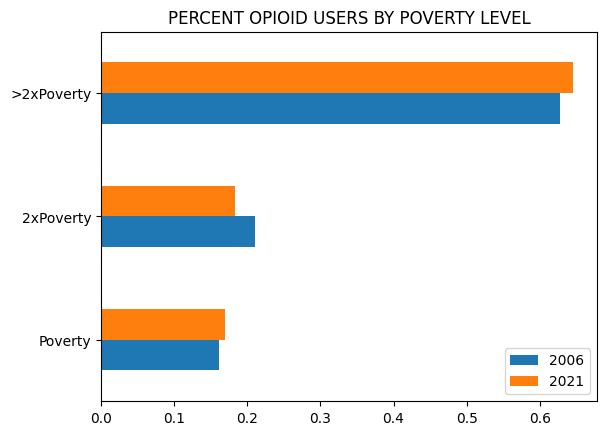

In [68]:
poverty.plot.barh(title="PERCENT OPIOID USERS BY POVERTY LEVEL")

GENDER

In [69]:
six_gender = six_demo.loc[(six_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/six_user_len
tw1_gender = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/tw1_user_len

In [70]:
d = {2006:[x for x in six_gender],2021:[x for x in tw1_gender]}
gender = pd.DataFrame(data=d,index=["Male","Female"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY GENDER'}>

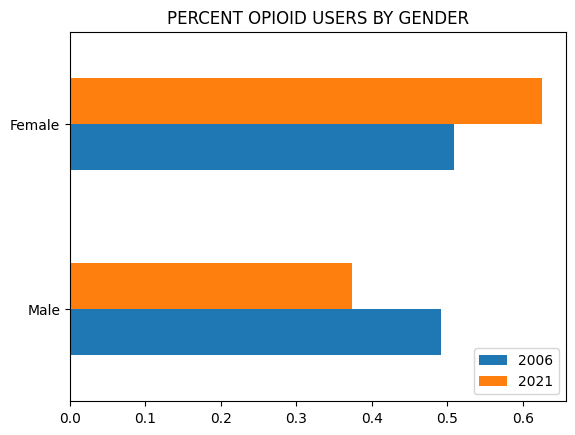

In [71]:
gender.plot.barh(title="PERCENT OPIOID USERS BY GENDER")

RECEIVE GOVERNMENT ASSISTANCE

In [72]:
six_govtprog = six_demo.loc[(six_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/six_user_len
tw1_govtprog = tw1_demo.loc[(tw1_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/tw1_user_len

In [73]:
d = {2006:[x for x in six_govtprog],2021:[x for x in tw1_govtprog]}
income = pd.DataFrame(data=d,index=["receive","do not receive"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE'}>

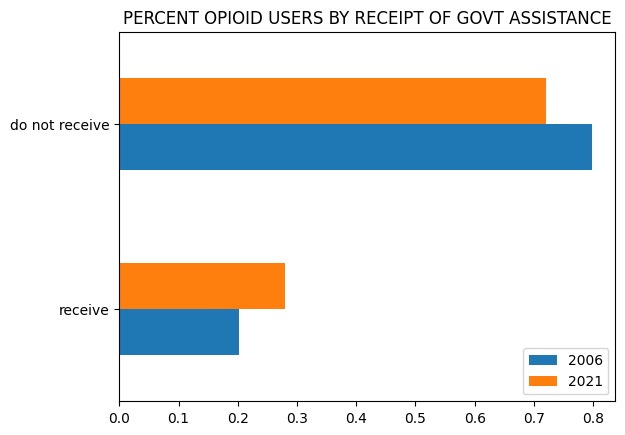

In [74]:
income.plot.barh(title="PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE")

INCOME

In [75]:
six_income = six_demo.loc[(six_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/six_user_len

In [76]:
tw1_income = tw1_demo.loc[(tw1_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/tw1_user_len

In [77]:
d = {2006:[x for x in six_income],2021:[x for x in tw1_income]}
income = pd.DataFrame(data=d,index=["<20K","20K-49K","50K-75K",">75K"])

<Axes: title={'center': 'PERCENT OF OPIOID USERS BY INCOME BRACKET'}>

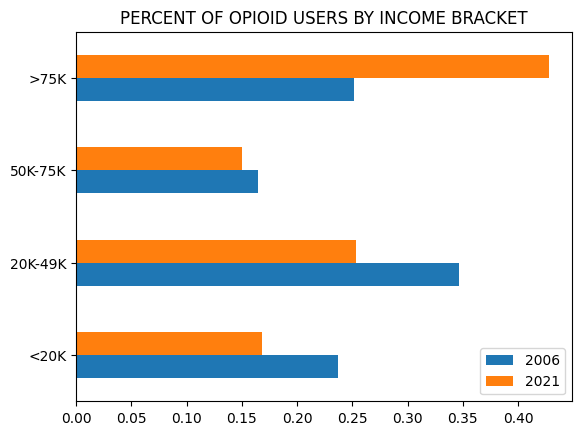

In [78]:
income.plot.barh(title='PERCENT OF OPIOID USERS BY INCOME BRACKET')

CORRELATION HEAT MAP

In [79]:
np.set_printoptions(precision=2,suppress=True)

In [80]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [81]:
dm_regnames = ['welfare','income','poverty','gender-race','education level','employment',
            'health','marital status','major depression ep','severe psych distress','mental health hospitalization']

du_regnames = ['tobacco','alcohol','marijuana','cocaine','crack','hallucinogens','inhalants','tranquilizer',
            'stimulant','methamphetamines','sedatives']
            
dm_corrlist_2006 = ['GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2','EMPSTATY',
                    'HEALTH2','IRMARIT','AJAMDEYR','SPDYRADJ','AMHINP2']

du_corrlist_2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR",
                    "STMYR","MTHYR","SEDYR"]

dm_corrlist_2021 = ['GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT','IRWRKSTAT',
                    'HEALTH2','IRMARIT','IRAMDEYR','SPDPSTYR','AMHINP2']

du_corrlist_2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR",
                    "TRQANYYR","STMANYYR","METHAMYR","SEDANYYR"]

dm_corrdf_2006 = six.loc[six["CATAG3"]==4,dm_corrlist_2006]
du_corrdf_2006 = six.loc[six["CATAG3"]==4,du_corrlist_2006]
dm_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,dm_corrlist_2021]
du_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,du_corrlist_2021]

In [82]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%c3%a9rs-coefficient-matrix
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [83]:
def corrmat(dataframe):
    colname = dataframe.columns.values.tolist()
    cols = len(colname)
    mat = np.empty([cols,cols])
    for x in range(cols):
        for y in range(x+1,cols):
            confusion_matrix = pd.crosstab(dataframe[colname[x]],dataframe[colname[y]]).to_numpy()
            corrval = round(cramers_corrected_stat(confusion_matrix),2)
            #print(corrval)
            mat[x,y]=round(corrval,2)
    return np.triu(mat,k=1)
            

In [84]:
def heatmap(data,year,regnames):
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    
    fig.set_size_inches(10,10)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(regnames)), labels=regnames)
    ax.set_yticks(np.arange(len(regnames)), labels=regnames)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(regnames)):
        for j in range(len(regnames)):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="w", fontsize='large')
    
    ax.set_title(f"Correlation Heatmap of Selected Fields from {year} NSDUH Survey")
    #fig.tight_layout()
    plt.show()

In [85]:
dm_data2006 = corrmat(dm_corrdf_2006)
du_data2006 = corrmat(du_corrdf_2006)

dm_data2021 = corrmat(dm_corrdf_2021)
du_data2021 = corrmat(du_corrdf_2021)


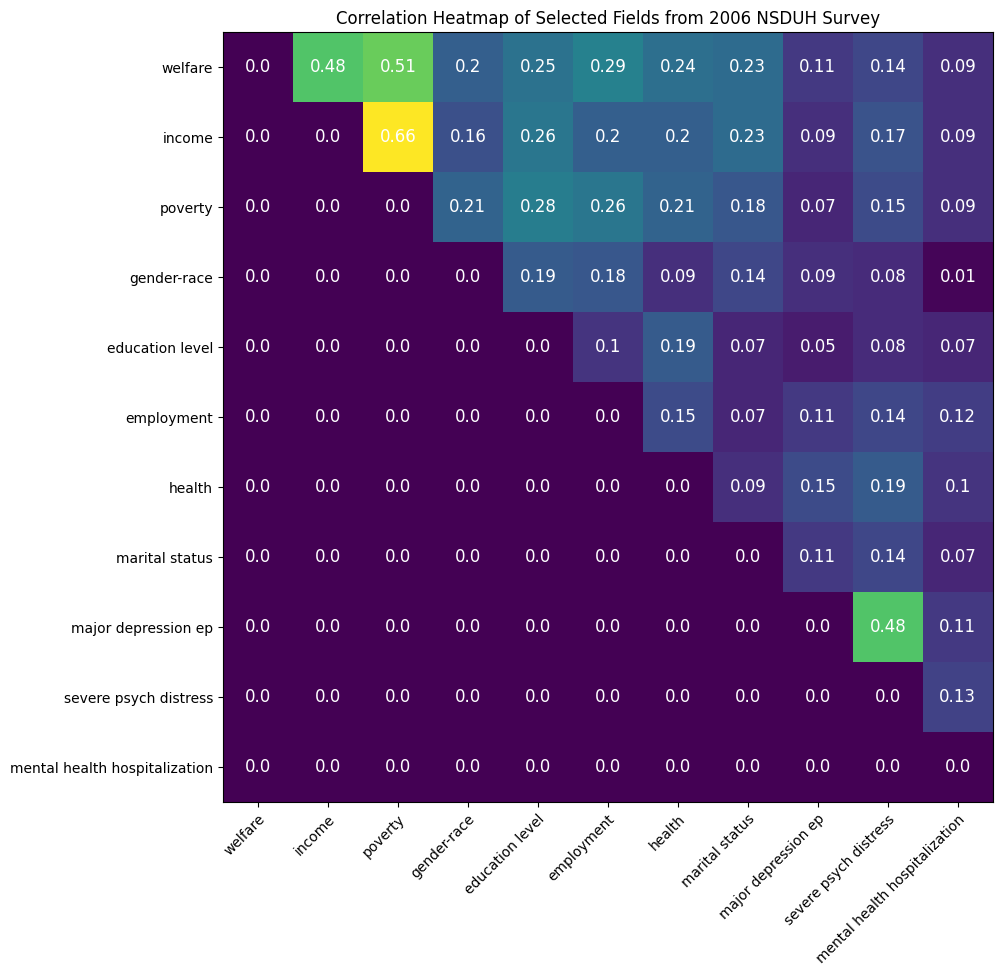

In [86]:
heatmap(dm_data2006,2006,dm_regnames)

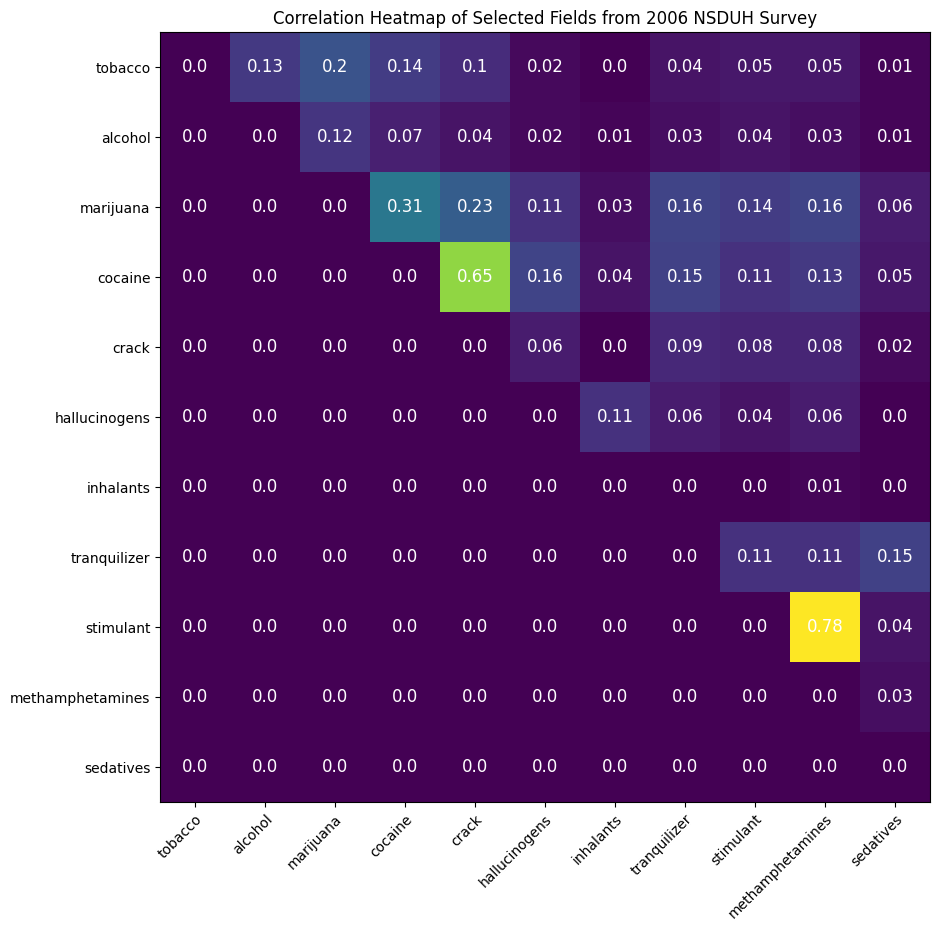

In [87]:
heatmap(du_data2006,2006,du_regnames)

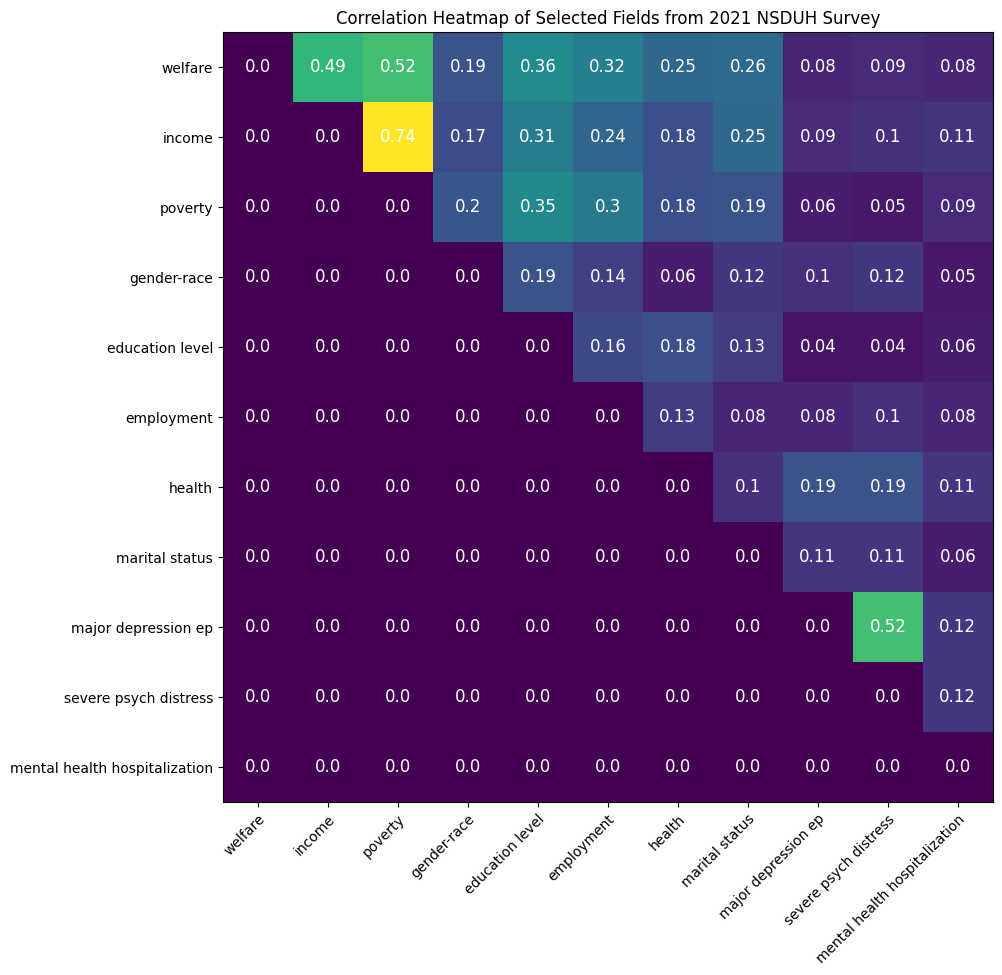

In [88]:
heatmap(dm_data2021,2021,dm_regnames)

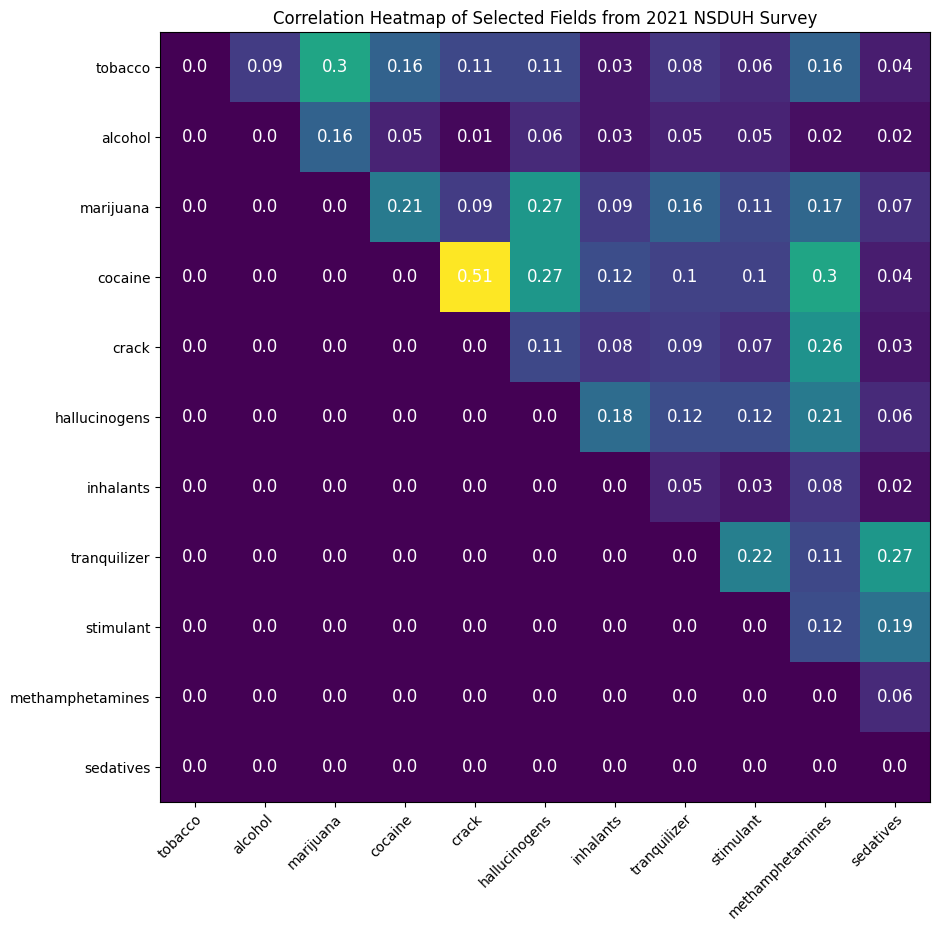

In [89]:
heatmap(du_data2021,2021,du_regnames)

Now to create the machine learning models

Import the needed packages from sklearn

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

Set up the 4 dataframes with the finally selected variables based on results of the correlation heat map

In [271]:
#2006 drug use
du_six_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALYR","INHYR","TRQYR","STMYR","SEDYR"]
#2021 drug use
du_tw1_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
                "METHAMYR","SEDANYYR"]

#2006 demographics
dm_six_final = ["INCOME","SEXRACE","EDUCCAT2","EMPSTATY","HEALTH2","IRMARIT","AJAMDEYR"]
#2021 demographics
dm_tw1_final = ['INCOME','SEXRACE','EDUHIGHCAT','IRWRKSTAT','HEALTH2','IRMARIT','IRAMDEYR']


In [272]:
du_six_X = six.loc[six["CATAG3"]==4,du_six_final]
du_six_y = six.loc[six["CATAG3"]==4,"CLASS"]

dm_six_X = six.loc[six["CATAG3"]==4,dm_six_final]
dm_six_y = six.loc[six["CATAG3"]==4,"CLASS"]

du_tw1_X = tw1.loc[tw1["CATAG3"]==4,du_tw1_final]
du_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"]

dm_tw1_X = tw1.loc[tw1["CATAG3"]==4,dm_tw1_final]
dm_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"]

Impute some missing data

In [273]:
imputer = IterativeImputer(random_state=42)
imputer.fit(dm_six_X)
dm_six_X_values = np.transpose(imputer.transform(dm_six_X))
dm_six_X['AJAMDEYR'] = dm_six_X_values[6]
dm_six_X['HEALTH2'] = dm_six_X_values[4]

imputer.fit(dm_tw1_X)
dm_tw1_X_values = np.transpose(imputer.transform(dm_tw1_X))
dm_tw1_X['HEALTH2'] = dm_tw1_X_values[4]

split each dataframe into 80/20 train/test

In [274]:
du_six_trainX, du_six_testX, du_six_trainy, du_six_testy = train_test_split(du_six_X, 
                                                                            du_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [275]:
dm_six_trainX, dm_six_testX, dm_six_trainy, dm_six_testy = train_test_split(dm_six_X, 
                                                                            dm_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [276]:
du_tw1_trainX, du_tw1_testX, du_tw1_trainy, du_tw1_testy = train_test_split(du_tw1_X, 
                                                                            du_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [277]:
dm_tw1_trainX, dm_tw1_testX, dm_tw1_trainy, dm_tw1_testy = train_test_split(dm_tw1_X, 
                                                                            dm_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

SETTING UP HYPERPARAMETER TUNING AND CROSS VALIDATION

In [303]:
#DECISION TREES
#------------------------
tree_parameters = {'criterion':('gini','entropy','log_loss'),
                   'max_depth':[x for x in range(1,11)],
                   'max_features':[None,'sqrt','log2']}
dtree = tree.DecisionTreeClassifier()
tree_hpt = GridSearchCV(dtree,tree_parameters,scoring=('f1'))

#BAYES CLASSIFIER
#------------------------
bayes_parameters = {'alpha':[0,.01,.02,.03,.04,.05,.06,.07,.08,.09,1.0]
                   }
bayes = MultinomialNB(force_alpha=True)
bayes_hpt = GridSearchCV(bayes,bayes_parameters,scoring=('f1'))

#LOGISTIC REGRESSION
#------------------------
logit_parameters = {'solver':['lbfgs','liblinear'],
                    'C':[1,10,20,50]}
logit = LogisticRegression()
logit_hpt = GridSearchCV(logit,logit_parameters,scoring=('f1'))



In [304]:
def optimal_hyper(x):
    return x.cv_results_['params'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [305]:
def optimal_score(x):
    return x.cv_results_['mean_test_score'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [306]:
def bigpic(x):
    return f"PARAMS:{optimal_hyper(x)}; SCORE:{optimal_score(x)}"

In [307]:
#2006 drug use decision tree optimal hyperparameters
tree_hpt.fit(du_six_trainX,du_six_trainy)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]
bigpic(tree_hpt)

"PARAMS:{'criterion': 'gini', 'max_depth': 1, 'max_features': None}; SCORE:0.3003573580890654"

In [308]:
#2006 drug use bayes optimal hyperparameters
bayes_hpt.fit(du_six_trainX,du_six_trainy)
bigpic(bayes_hpt)

"PARAMS:{'alpha': 0}; SCORE:0.21753518581834697"

In [309]:
#2006 drug use logit optimal hyperparameters
logit_hpt.fit(du_six_trainX,du_six_trainy)
bigpic(logit_hpt)

"PARAMS:{'C': 10, 'solver': 'lbfgs'}; SCORE:0.22733882080360956"

In [310]:
#2006 demographic dtree optimal hyperparameters
tree_hpt.fit(dm_six_trainX,dm_six_trainy)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]
bigpic(tree_hpt)

"PARAMS:{'criterion': 'entropy', 'max_depth': 9, 'max_features': None}; SCORE:0.042948318070881966"

In [311]:
#2006 demographic bayes optimal hyperparameters
bayes_hpt.fit(dm_six_trainX,dm_six_trainy)
bigpic(bayes_hpt)

"PARAMS:{'alpha': 0}; SCORE:0.0"

In [312]:
#2006 demographic logit hyperparameters
logit_hpt.fit(dm_six_trainX,dm_six_trainy)
bigpic(logit_hpt)

"PARAMS:{'C': 1, 'solver': 'lbfgs'}; SCORE:0.0"

In [314]:
#2021 drug use dtree hyperparameters
tree_hpt.fit(du_tw1_trainX,du_tw1_trainy)
bigpic(tree_hpt)

"PARAMS:{'criterion': 'gini', 'max_depth': 1, 'max_features': None}; SCORE:0.39873108255504014"

In [315]:
#2021 drug use bayes hyperparameters
bayes_hpt.fit(du_tw1_trainX,du_tw1_trainy)
bigpic(bayes_hpt)

"PARAMS:{'alpha': 0}; SCORE:0.24955327552975443"

In [316]:
#2021 drug use logit hyperparameters
logit_hpt.fit(du_tw1_trainX,du_tw1_trainy)
bigpic(logit_hpt)

"PARAMS:{'C': 10, 'solver': 'lbfgs'}; SCORE:0.3207550126100447"

In [317]:
#2021 demographics dtree hyperparameters
tree_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
bigpic(tree_hpt)

"PARAMS:{'criterion': 'log_loss', 'max_depth': 8, 'max_features': None}; SCORE:0.2108507681681328"

In [318]:
#2021 demographics bayes hyperparameters
bayes_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
bigpic(bayes_hpt)

"PARAMS:{'alpha': 1.0}; SCORE:0.07295258903767825"

In [319]:
#2021 demographics logit hyperparameters
logit_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
bigpic(logit_hpt)

"PARAMS:{'C': 1, 'solver': 'lbfgs'}; SCORE:0.07313645780831542"

Now that we know the optimal hyperparameters, time to create final 12 models(3 models x 4 dataset)

2006 DRUG USE VARIABLES

In [335]:
#2006 Drug Use dtree
du_six_tree_final = tree.DecisionTreeClassifier(criterion='gini',max_depth=1,max_features=None)
du_six_tree_final.fit(du_six_trainX,du_six_trainy)
du_six_tree_predy = du_six_tree_final.predict(du_six_testX)
du_six_tree_f1 = f1_score(du_six_testy,du_six_tree_predy)
print(f"f1_score: {np.round(du_six_tree_f1,4)}")

f1_score: 0.186


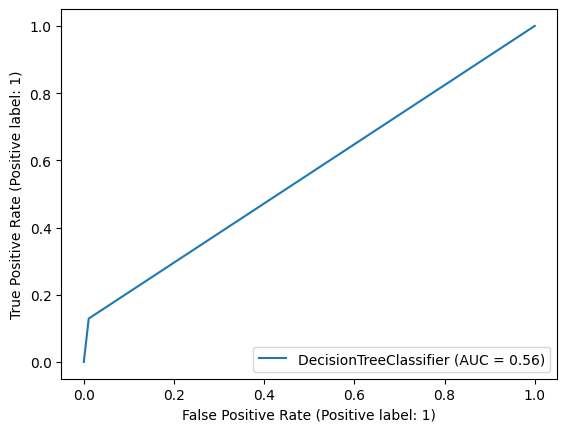

In [333]:
RocCurveDisplay.from_estimator(du_six_tree_final,du_six_testX,du_six_testy)

In [338]:
#2006 Drug Use Bayes
du_six_bayes_final = MultinomialNB(force_alpha = True,alpha=0)
du_six_bayes_final.fit(du_six_trainX,du_six_trainy)
du_six_bayes_predy = du_six_bayes_final.predict(du_six_testX)
du_six_bayes_f1 = f1_score(du_six_testy,du_six_bayes_predy)
print(f"f1_score: {np.round(du_six_bayes_f1,4)}")

f1_score: 0.2338


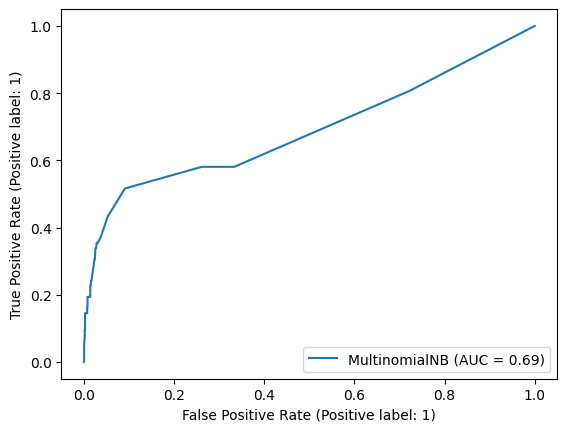

In [339]:
RocCurveDisplay.from_estimator(du_six_bayes_final,du_six_testX,du_six_testy)

In [341]:
#2006 Drug Use Logit
du_six_logit_final = LogisticRegression(C=10,solver='lbfgs')
du_six_logit_final.fit(du_six_trainX,du_six_trainy)
du_six_logit_predy = du_six_logit_final.predict(du_six_testX)
du_six_logit_f1 = f1_score(du_six_testy,du_six_logit_predy)
print(f"f1_score: {np.round(du_six_logit_f1,4)}")

f1_score: 0.1818


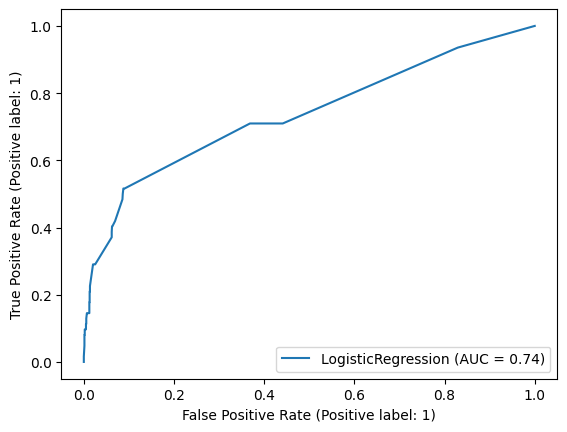

In [342]:
RocCurveDisplay.from_estimator(du_six_logit_final,du_six_testX,du_six_testy)

2006 DEMOGRAPHIC VARIABLES

In [360]:
#2006 Demogra dtree
dm_six_tree_final = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,max_features=None)
dm_six_tree_final.fit(dm_six_trainX,dm_six_trainy)
dm_six_tree_predy = dm_six_tree_final.predict(dm_six_testX)

dm_six_tree_cf = confusion_matrix(dm_six_testy,dm_six_tree_predy)
dm_six_tree_f1 = f1_score(dm_six_testy,dm_six_tree_predy)
dm_six_tree_recall = recall_score(dm_six_testy,dm_six_tree_predy)
dm_six_tree_precis = precision_score(dm_six_testy,dm_six_tree_predy)
dm_six_tree_accura = accuracy_score(dm_six_testy,dm_six_tree_predy)

print(dm_six_tree_cf)
print(f"f1_score: {np.round(dm_six_tree_f1,4)}")
print(f"recall score: {dm_six_tree_recall}")
print(f"precision score: {dm_six_tree_precis}")
print(f"accuracy score: {dm_six_tree_accura}")

[[1460   11]
 [  62    0]]
f1_score: 0.0
recall score: 0.0
precision score: 0.0
accuracy score: 0.9523809523809523


In [358]:
#only predicted 11; that's the 11 false positives in the conf mtrx 
sum=0
for x in dm_six_tree_predy:
    sum = sum + x
print(sum)

11


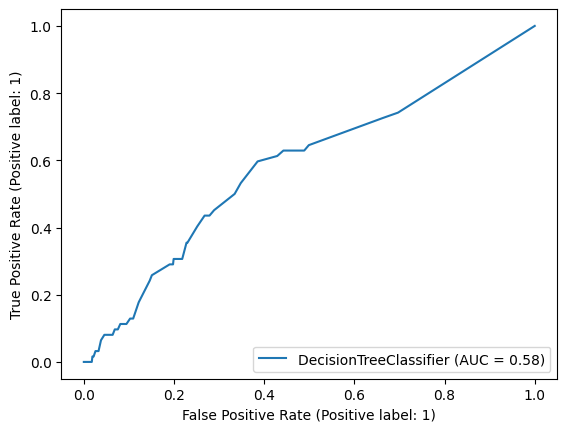

In [345]:
RocCurveDisplay.from_estimator(dm_six_tree_final,dm_six_testX,dm_six_testy)

In [356]:
#2006 Demogra Bayes - DOESN'T PREDICT ANY POSITIVES...
dm_six_bayes_final = MultinomialNB(force_alpha=True,alpha=0)
dm_six_bayes_final.fit(dm_six_trainX,dm_six_trainy)
dm_six_bayes_predy = dm_six_bayes_final.predict(dm_six_testX)

dm_six_bayes_f1 = f1_score(dm_six_testy,dm_six_bayes_predy)
dm_six_bayes_recall = recall_score(dm_six_testy,dm_six_bayes_predy)
dm_six_bayes_precis = precision_score(dm_six_testy,dm_six_bayes_predy)
dm_six_bayes_accura = accuracy_score(dm_six_testy,dm_six_bayes_predy)

print(f"f1_score: {np.round(dm_six_bayes_f1,4)}")
print(f"recall score: {dm_six_bayes_recall}")
print(f"precision score: {dm_six_bayes_precis}")
print(f"accuracy score: {dm_six_bayes_accura}")

f1_score: 0.0
recall score: 0.0
precision score: 0.0
accuracy score: 0.95955642530985


/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


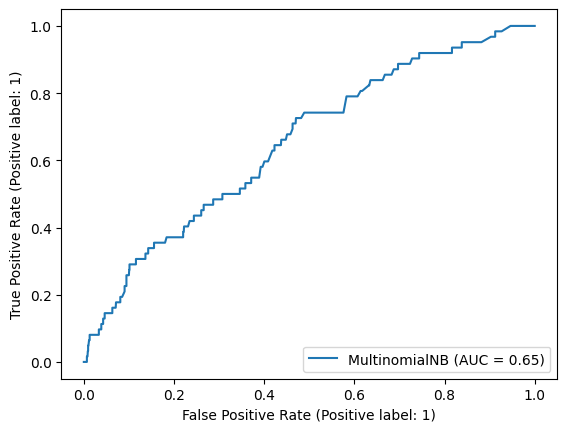

In [364]:
RocCurveDisplay.from_estimator(dm_six_bayes_final,dm_six_testX,dm_six_testy)

In [363]:
#2006 Demogra Logit
dm_six_logit_final = LogisticRegression(C=1,solver='lbfgs')
dm_six_logit_final.fit(dm_six_trainX,dm_six_trainy)
dm_six_logit_predy = dm_six_logit_final.predict(dm_six_testX)

dm_six_logit_f1 = f1_score(dm_six_testy,dm_six_logit_predy)
dm_six_logit_recall = recall_score(dm_six_testy,dm_six_logit_predy)
dm_six_logit_precis = precision_score(dm_six_testy,dm_six_logit_predy)
dm_six_logit_accura = accuracy_score(dm_six_testy,dm_six_logit_predy)

print(f"f1_score: {np.round(dm_six_logit_f1,4)}")
print(f"recall score: {dm_six_logit_recall}")
print(f"precision score: {dm_six_logit_precis}")
print(f"accuracy score: {dm_six_logit_accura}")

f1_score: 0.0
recall score: 0.0
precision score: 0.0
accuracy score: 0.95955642530985


/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


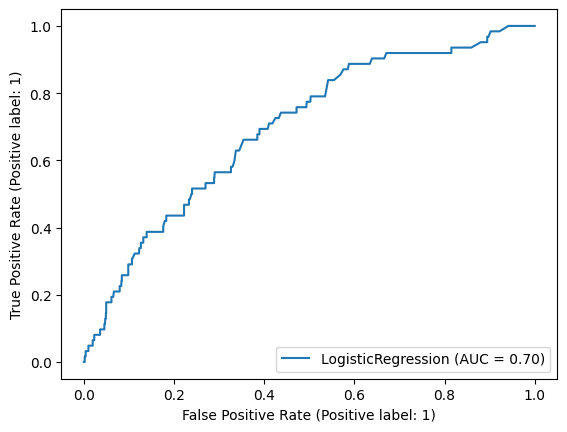

In [365]:
RocCurveDisplay.from_estimator(dm_six_logit_final,dm_six_testX,dm_six_testy)

In [367]:
#2021 Drug Use dtree
du_tw1_tree_final = tree.DecisionTreeClassifier(criterion='gini',max_depth=1,max_features=None)
du_tw1_tree_final.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_tree_predy = du_tw1_tree_final.predict(du_tw1_testX)

du_tw1_tree_f1 = f1_score(du_tw1_testy,du_tw1_tree_predy)

print(f"f1_score: {np.round(du_tw1_tree_f1,4)}")

f1_score: 0.404


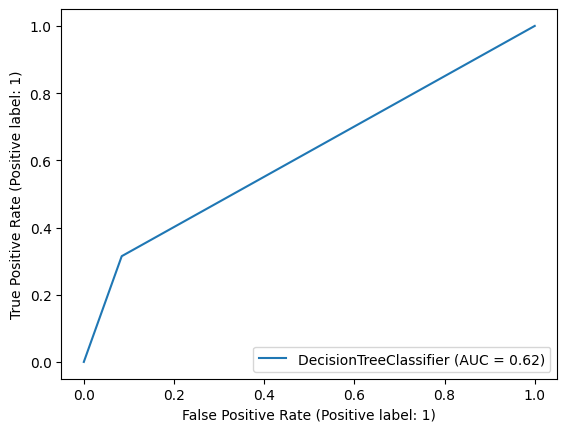

In [369]:
RocCurveDisplay.from_estimator(du_tw1_tree_final,du_tw1_testX,du_tw1_testy)

In [371]:
#2021 Drug Use Bayes
du_tw1_bayes_final = MultinomialNB(force_alpha = True,alpha=0)
du_tw1_bayes_final.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_bayes_predy = du_tw1_bayes_final.predict(du_tw1_testX)

du_tw1_bayes_f1 = f1_score(du_tw1_testy,du_tw1_bayes_predy)

print(f"f1_score: {np.round(du_tw1_bayes_f1,4)}")

f1_score: 0.2539


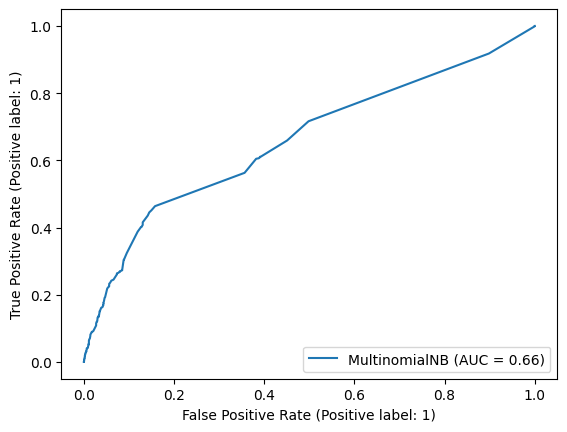

In [372]:
RocCurveDisplay.from_estimator(du_tw1_bayes_final,du_tw1_testX,du_tw1_testy)

In [373]:
#2021 Drug Use Logit
du_tw1_logit_final = LogisticRegression(C=10,solver='lbfgs')
du_tw1_logit_final.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_logit_predy = du_tw1_logit_final.predict(du_tw1_testX)

du_tw1_logit_f1 = f1_score(du_tw1_testy,du_tw1_logit_predy)

print(f"f1_score: {np.round(du_tw1_logit_f1,4)}")

f1_score: 0.3127


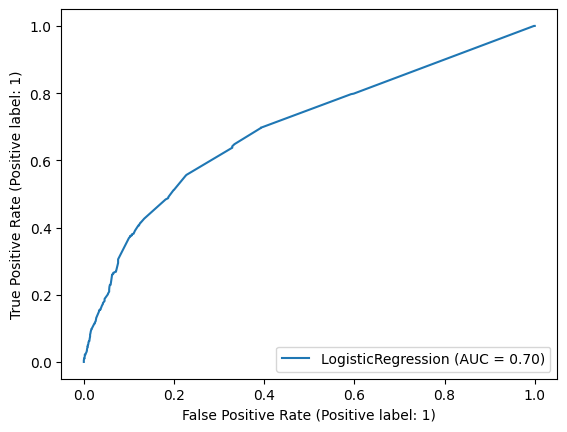

In [374]:
RocCurveDisplay.from_estimator(du_tw1_logit_final,du_tw1_testX,du_tw1_testy)

In [376]:
#2021 Demogra dtree
dm_tw1_tree_final = tree.DecisionTreeClassifier(criterion='log_loss',max_depth=8,max_features=None)
dm_tw1_tree_final.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_tree_predy = dm_tw1_tree_final.predict(dm_tw1_testX)

dm_tw1_tree_f1 = f1_score(dm_tw1_testy,dm_tw1_tree_predy)

print(f"f1_score: {np.round(dm_tw1_tree_f1,4)}")

f1_score: 0.2569


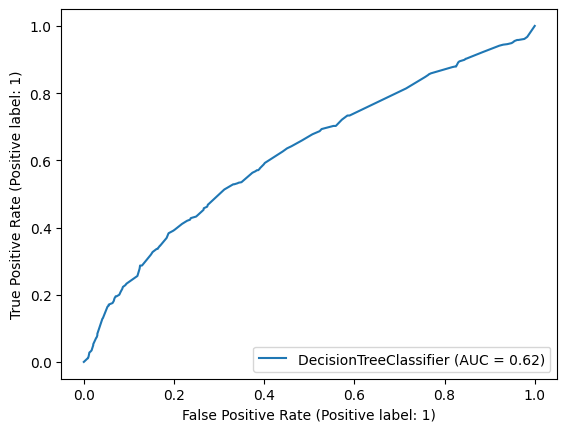

In [377]:
RocCurveDisplay.from_estimator(dm_tw1_tree_final,dm_tw1_testX,dm_tw1_testy)

In [378]:
#2021 Demogra Bayes
dm_tw1_bayes_final = MultinomialNB(force_alpha=True,alpha=1)
dm_tw1_bayes_final.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_bayes_predy = dm_tw1_bayes_final.predict(dm_tw1_testX)

dm_tw1_bayes_f1 = f1_score(dm_tw1_testy,dm_tw1_bayes_predy)

print(f"f1_score: {np.round(dm_tw1_bayes_f1,4)}")

f1_score: 0.0603


AttributeError: Line2D.set() got an unexpected keyword argument 'plot_chance_level'

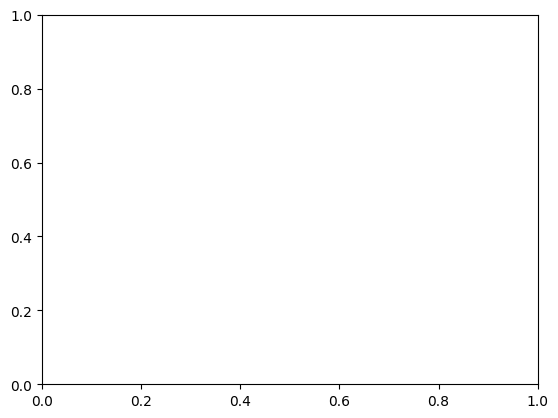

In [388]:
RocCurveDisplay.from_estimator(dm_tw1_bayes_final,dm_tw1_testX,dm_tw1_testy,plot_chance_level=True)

In [381]:
#2021 Demogra Logit
dm_tw1_logit_final = LogisticRegression(C=1,solver='lbfgs')
dm_tw1_logit_final.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_logit_predy = dm_tw1_logit_final.predict(dm_tw1_testX)

dm_tw1_logit_f1 = f1_score(dm_tw1_testy,dm_tw1_logit_predy)

print(f"f1_score: {np.round(dm_tw1_logit_f1,4)}")

f1_score: 0.0668


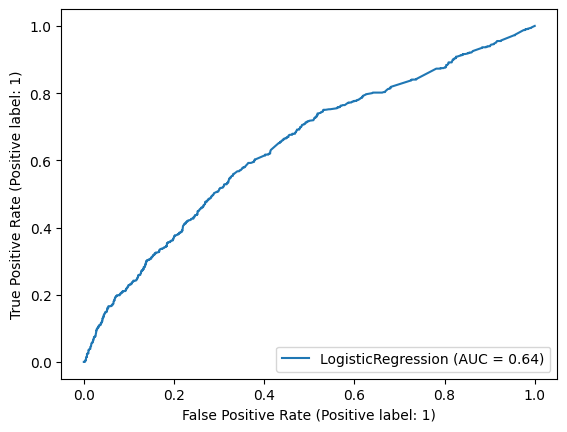

In [382]:
RocCurveDisplay.from_estimator(dm_tw1_logit_final,dm_tw1_testX,dm_tw1_testy)

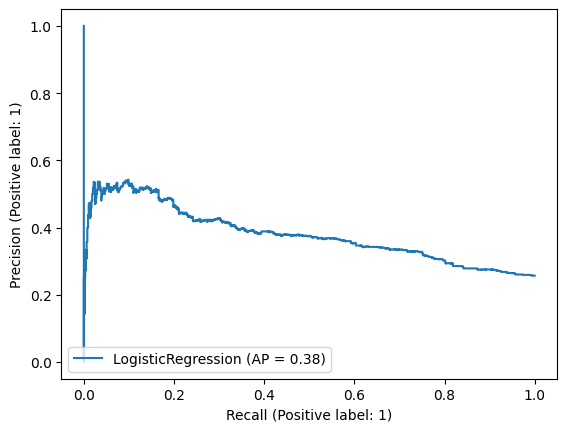

In [386]:
PrecisionRecallDisplay.from_estimator(dm_tw1_logit_final,dm_tw1_testX,dm_tw1_testy)

In [115]:
accuracy_score(du_six_testy, du_six_testy_pred)

0.9562948467058056

In [116]:
precision_score(du_six_testy,du_six_testy_pred)

0.391304347826087

In [117]:
recall_score(du_six_testy,du_six_testy_pred)

0.14516129032258066

[Text(0.5, 0.8333333333333334, 'x[6] <= 0.5\ngini = 0.088\nsamples = 6132\nvalue = [5848, 284]\nclass = y[0]'),
 Text(0.25, 0.5, 'x[2] <= 0.5\ngini = 0.072\nsamples = 6024\nvalue = [5799, 225]\nclass = y[0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.054\nsamples = 5510\nvalue = [5356, 154]\nclass = y[0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.238\nsamples = 514\nvalue = [443, 71]\nclass = y[0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.496\nsamples = 108\nvalue = [49, 59]\nclass = y[1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.497\nsamples = 89\nvalue = [48, 41]\nclass = y[0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.1\nsamples = 19\nvalue = [1, 18]\nclass = y[1]')]

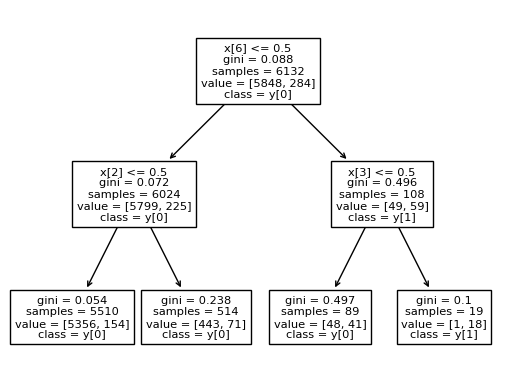

In [101]:
tree.plot_tree(clf,class_names=True)

In [102]:
y=0
for x in list(du_six_testX.columns.values):
    print(f"{y}: {x}")
    y = y+1

0: TOBYR
1: ALCYR
2: MRJYR
3: COCYR
4: HALYR
5: INHYR
6: TRQYR
7: STMYR
8: SEDYR
